In [ ]:
import os 
import nibabel as nib
import numpy as np
import seaborn as sns
from scipy.signal import butter, lfilter



def butter_bandpass(lowcut, highcut, fs, order=6):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=6):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def filt_sig(raw_sig, tr, low=0.01, high=0.1):
    fs = 1/tr
    filtered_sig = butter_bandpass_filter(raw_sig, low, high, fs)
    return filtered_sig


(80, 80, 500)


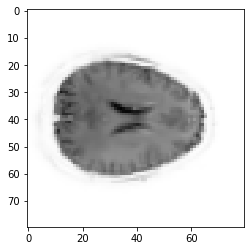

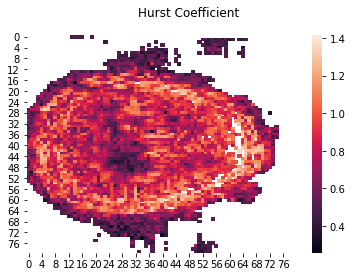

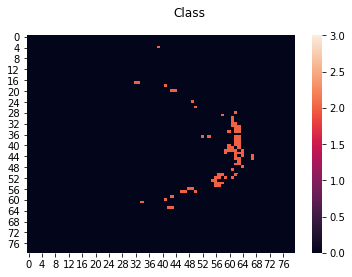

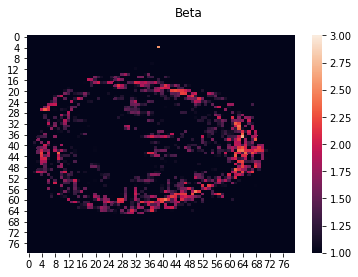

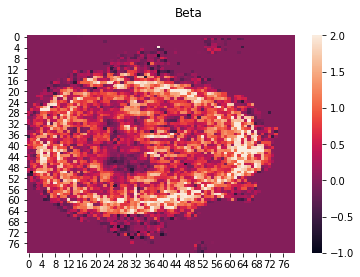

In [2]:
import multiprocessing
from joblib import Parallel, delayed
import os 
import nibabel as nib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ipynb.fs.defs.FracTool_Current_fGn_Only import FracTool



#load sample slice and convert to np array
example_slice = 'sub-01_movie_mcf.nii.gz'
slice_img = nib.load(example_slice, mmap=False)
slice_array = slice_img.get_fdata()
slice_sq = slice_array[:,:,20,0:500]
print(slice_sq.shape)

#images of slice:
#imgplot = plt.imshow(slice_sq[:,:,1])
imgplot = plt.imshow(slice_sq[:,:,1],cmap='Greys',  interpolation='nearest')
plt.show()


[N1,N2,N3] = slice_sq.shape
row = np.arange(0,N1)
column = np.arange(0,N2)
TR = 2.0 #temporal resolution of signal 

def FracTool_voxel(i, j):
    '''This function returns the Hurst coefficient and class of each voxel in the fMRI slice'''
    global TR
    rawbold = (slice_sq[i,j])
    result = FracTool(rawbold, TR) #run Fractool on each signal in signal array
    H_val = result[1] #result[1] of FracTool is Hurst value
    Class_val = result[0] #result[0] of FracTool is Class
    return result #result is array of 2 elements

#multiprocessing for loop
num_cores = multiprocessing.cpu_count()
output = Parallel(n_jobs=num_cores)(delayed(FracTool_voxel)(i,j) for i in row for j in column)
#output is j*i length list of result (2 values in each result)

output = np.array(output) #convert output into numpy array
output = output.astype(np.float64) #convert type object list elements to type float

Class_matrix = output[:,0] #first column of result output array of result is class

Hurst_matrix = output[:,1] #second column of result output array of result is Hurst 
Beta_matrix = output[:,2]

#generate heat maps
Hurst_matrix = Hurst_matrix.reshape(N1,N2)
np.savetxt('Hurst_matrix.txt',Hurst_matrix,fmt='%.2f')
Hurst_map = sns.heatmap(Hurst_matrix)
Hurst_fig = Hurst_map.get_figure()
Hurst_fig.suptitle('Hurst Coefficient')
Hurst_fig.savefig('Hurst_Heatmap.png')
plt.show()

Class_matrix = Class_matrix.reshape(N1,N2)
np.savetxt('Class_matrix.txt',Class_matrix,fmt='%.2f')
Class_map = sns.heatmap(Class_matrix, vmin=0, vmax=3)
Class_fig = Class_map.get_figure()
Class_fig.suptitle('Class')
Class_fig.savefig('Class_Heatmap.png')
plt.show()

Beta_matrix = Beta_matrix.reshape(N1,N2)
np.savetxt('Beta_matrix.txt',Beta_matrix,fmt='%.2f')
Beta_map = sns.heatmap(Beta_matrix, vmin=1, vmax=3)
Beta_fig = Beta_map.get_figure()
Beta_fig.suptitle('Beta')
Beta_fig.savefig('Beta_Heatmap.png')
plt.show()

Beta_matrix = Beta_matrix.reshape(N1,N2)
np.savetxt('Beta_matrix.txt',Beta_matrix,fmt='%.2f')
Beta_map = sns.heatmap(Beta_matrix, vmin=-1, vmax=2)
Beta_fig = Beta_map.get_figure()
Beta_fig.suptitle('Beta')
Beta_fig.savefig('Beta_Heatmap.png')
plt.show()

(3.5, 3.5, 3.5, 1.0)


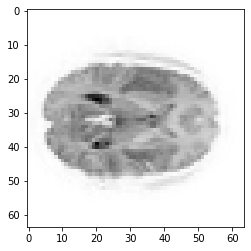

KeyboardInterrupt: 

In [5]:
#multiprocessor call to FracTool
import multiprocessing
from joblib import Parallel, delayed
import os 
import nibabel as nib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ipynb.fs.defs.FracTool_Current_fGn_Only import FracTool

#load sample slice and convert to np array
example_slice = 'SCI_Pilot_08/SCI_Pilot_08_fMRI_Slice.nii.gz'
#info = niftiinfo('brain.nii')

slice_img = nib.load(example_slice, mmap=False)
n1_header = slice_img.header
trep = n1_header.get_zooms()
print(trep)
#slice_img = nib.Nifti1Image.from_filename('SCI_Pilot_08/SCI_Pilot_08_fMRI_Slice.nii.gz')

slice_array = slice_img.get_fdata()
slice_sq = np.squeeze(slice_array)
#images of slice:
#imgplot = plt.imshow(slice_sq[:,:,1])
imgplot = plt.imshow(slice_sq[:,:,1],cmap='Greys',  interpolation='nearest')
plt.show()

[N1,N2,N3] = slice_sq.shape
row = np.arange(0,N1)
column = np.arange(0,N2)
TR = 2.4 #temporal resolution of signal 

def FracTool_voxel(i, j):
    '''This function returns the Hurst coefficient and class of each voxel in the fMRI slice'''
    global TR
    rawbold = (slice_sq[i,j])
    result = FracTool(rawbold, TR) #run Fractool on each signal in signal array
    H_val = result[1] #result[1] of FracTool is Hurst value
    Class_val = result[0] #result[0] of FracTool is Class
    return result #result is array of 2 elements

#multiprocessing for loop
num_cores = multiprocessing.cpu_count()
output = Parallel(n_jobs=num_cores)(delayed(FracTool_voxel)(i,j) for i in row for j in column)
#output is j*i length list of result (2 values in each result)

output = np.array(output) #convert output into numpy array
output = output.astype(np.float64) #convert type object list elements to type float

Class_matrix = output[:,0] #first column of result output array of result is class

Hurst_matrix = output[:,1] #second column of result output array of result is Hurst 
Beta_matrix = output[:,2]

#generate heat maps
Hurst_matrix = Hurst_matrix.reshape(N1,N2)
np.savetxt('Hurst_matrix.txt',Hurst_matrix,fmt='%.2f')
Hurst_map = sns.heatmap(Hurst_matrix)
Hurst_fig = Hurst_map.get_figure()
Hurst_fig.suptitle('Hurst Coefficient')
Hurst_fig.savefig('Hurst_Heatmap.png')
plt.show()

Class_matrix = Class_matrix.reshape(N1,N2)
np.savetxt('Class_matrix.txt',Class_matrix,fmt='%.2f')
Class_map = sns.heatmap(Class_matrix, vmin=0, vmax=3)
Class_fig = Class_map.get_figure()
Class_fig.suptitle('Class')
Class_fig.savefig('Class_Heatmap.png')
plt.show()

Beta_matrix = Beta_matrix.reshape(N1,N2)
np.savetxt('Beta_matrix.txt',Beta_matrix,fmt='%.2f')
Beta_map = sns.heatmap(Beta_matrix, vmin=1, vmax=3)
Beta_fig = Beta_map.get_figure()
Beta_fig.suptitle('Beta')
Beta_fig.savefig('Beta_Heatmap.png')
plt.show()

Beta_matrix = Beta_matrix.reshape(N1,N2)
np.savetxt('Beta_matrix.txt',Beta_matrix,fmt='%.2f')
Beta_map = sns.heatmap(Beta_matrix, vmin=-1, vmax=2)
Beta_fig = Beta_map.get_figure()
Beta_fig.suptitle('Beta')
Beta_fig.savefig('Beta_Heatmap.png')
plt.show()

(3.0, 3.0, 3.300001, 2.0000007)
2.0000007
(80, 80, 3599)


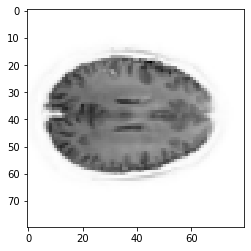

2.0000007


KeyboardInterrupt: 

In [14]:
#multiprocessor call to FracTool on long time series 3600 time points
import multiprocessing
from joblib import Parallel, delayed
import os 
import nibabel as nib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from ipynb.fs.defs.Fractool_Current_fGn_Only import FracTool



#load sample slice and convert to np array
example_slice = 'Long-timeseries_OpenfMRI/sub-06_ses-movie_task-movie_bold_mcf.nii.gz'
slice_img = nib.load(example_slice, mmap=False)

n1_header = slice_img.header
trep = n1_header.get_zooms()
trep = np.asarray(trep)
TR = trep[3]
slice_array = slice_img.get_fdata()
slice_sq = slice_array[:,:,20,:]
print(slice_sq.shape)

#images of slice:
#imgplot = plt.imshow(slice_sq[:,:,1])
imgplot = plt.imshow(slice_sq[:,:,1],cmap='Greys',  interpolation='nearest')
plt.show()

[N1,N2,N3] = slice_sq.shape
row = np.arange(0,N1)
column = np.arange(0,N2)
TR = 2.0 #temporal resolution of signal 

def FracTool_voxel(i, j):
    '''This function returns the Hurst coefficient and class of each voxel in the fMRI slice'''
    global TR
    rawbold = (slice_sq[i,j])
    rawbold =filt_sig
    result = FracTool(rawbold, TR) #run Fractool on each signal in signal array
    H_val = result[1] #result[1] of FracTool is Hurst value
    Class_val = result[0] #result[0] of FracTool is Class
    return result 

#multiprocessing for loop
num_cores = multiprocessing.cpu_count()
output = Parallel(n_jobs=num_cores)(delayed(FracTool_voxel)(i,j) for i in row for j in column)

output = np.array(output)
output = output.astype(np.float64)

Class_matrix = output[:,0]
Hurst_matrix = output[:,1]
Beta_matrix = output[:,2]



Class_matrix = Class_matrix.reshape(N1,N2)
Class_map = sns.heatmap(Class_matrix, vmin=0, vmax=3)
Class_fig = Class_map.get_figure()
#Class_fig.savefig('Class_Heatmap.png')
plt.show()

Beta_matrix = Beta_matrix.reshape(N1,N2)
np.savetxt('Beta_matrix.txt',Beta_matrix,fmt='%.2f')
Beta_map = sns.heatmap(Beta_matrix, vmin=1, vmax=3)
Beta_fig = Beta_map.get_figure()
Beta_fig.suptitle('Beta')
Beta_fig.savefig('Beta_Heatmap.png')
plt.show()

Beta_matrix = Beta_matrix.reshape(N1,N2)
np.savetxt('Beta_matrix.txt',Beta_matrix,fmt='%.2f')
Beta_map = sns.heatmap(Beta_matrix, vmin=-1, vmax=2)
Beta_fig = Beta_map.get_figure()
Beta_fig.suptitle('Beta')
Beta_fig.savefig('Beta_Heatmap.png')
plt.show()

Hurst_matrix = Hurst_matrix.reshape(N1,N2)
Hurst_map = sns.heatmap(Hurst_matrix)
Hurst_fig = Hurst_map.get_figure()
#Hurst_fig.savefig('Hurst_Heatmap.png')
plt.show()

In [13]:
#multiprocessor call to FracTool on long time series 3600 time points
import multiprocessing
from joblib import Parallel, delayed
import os 
import nibabel as nib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from ipynb.fs.defs.Fractool_Current_fGn_Only import FracTool



#load sample slice and convert to np array
example_slice = 'greymatter.nii.gz'
slice_img = nib.load(example_slice, mmap=False)
slice_array = slice_img.get_fdata()
slice_sq = slice_array[:,:,20,:]
print(slice_sq.shape)

#images of slice:
#imgplot = plt.imshow(slice_sq[:,:,1])
imgplot = plt.imshow(slice_sq[:,:,1],cmap='Greys',  interpolation='nearest')
plt.show()

[N1,N2,N3] = slice_sq.shape
row = np.arange(0,N1)
column = np.arange(0,N2)
TR = 2.0 #temporal resolution of signal 

def FracTool_voxel(i, j):
    '''This function returns the Hurst coefficient and class of each voxel in the fMRI slice'''
    global TR
    rawbold = (slice_sq[i,j])
    result = FracTool(rawbold, TR) #run Fractool on each signal in signal array
    H_val = result[1] #result[1] of FracTool is Hurst value
    Class_val = result[0] #result[0] of FracTool is Class
    return result 

#multiprocessing for loop
num_cores = multiprocessing.cpu_count()
output = Parallel(n_jobs=num_cores)(delayed(FracTool_voxel)(i,j) for i in row for j in column)

output = np.array(output)
output = output.astype(np.float64)

Class_matrix = output[:,0]
Hurst_matrix = output[:,1]
Hurst_avg = np.nanmean(Hurst_matrix)
print('Hurst avg', Hurst_avg)
Beta_matrix = output[:,2]



Class_matrix = Class_matrix.reshape(N1,N2)
Class_map = sns.heatmap(Class_matrix, vmin=0, vmax=3)
Class_fig = Class_map.get_figure()
Beta_fig.suptitle('Class')

#Class_fig.savefig('Class_Heatmap.png')
plt.show()

Beta_matrix = Beta_matrix.reshape(N1,N2)
np.savetxt('Beta_matrix.txt',Beta_matrix,fmt='%.2f')
Beta_map = sns.heatmap(Beta_matrix, vmin=1, vmax=3)
Beta_fig = Beta_map.get_figure()
Beta_fig.suptitle('Beta')
Beta_fig.savefig('Beta_Heatmap.png')
plt.show()

Beta_matrix = Beta_matrix.reshape(N1,N2)
np.savetxt('Beta_matrix.txt',Beta_matrix,fmt='%.2f')
Beta_map = sns.heatmap(Beta_matrix, vmin=-1, vmax=0.999)
Beta_fig = Beta_map.get_figure()
Beta_fig.suptitle('Beta')
Beta_fig.savefig('Beta_Heatmap.png')
plt.show()

Hurst_matrix = Hurst_matrix.reshape(N1,N2)
Hurst_map = sns.heatmap(Hurst_matrix)
Hurst_fig = Hurst_map.get_figure()
Hurst_fig.suptitle('Hurst')

#Hurst_fig.savefig('Hurst_Heatmap.png')
plt.show()

FileNotFoundError: No such file or no access: 'greymatter.nii.gz'

(80, 80, 3599)


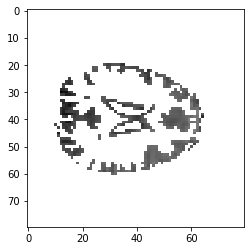

Hurst avg 0.9067307404881354


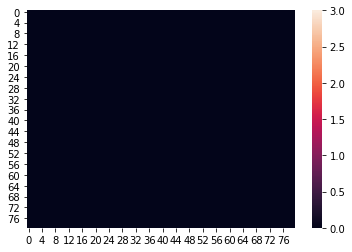

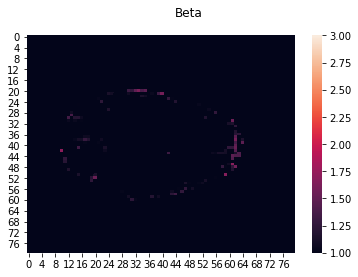

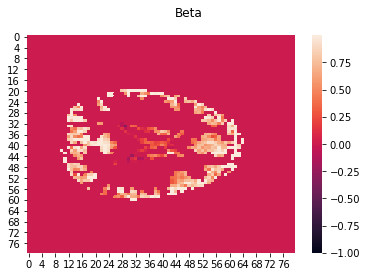

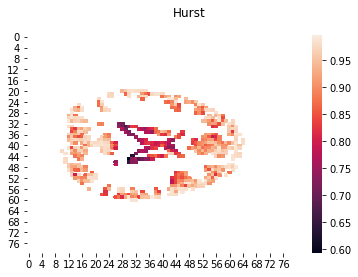

In [10]:
#multiprocessor call to FracTool on long time series 3600 time points
import multiprocessing
from joblib import Parallel, delayed
import os 
import nibabel as nib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from ipynb.fs.defs.Fractool_Current_fGn_Only import FracTool



#load sample slice and convert to np array
example_slice = 'greymatter01.nii.gz'
slice_img = nib.load(example_slice, mmap=False)
slice_array = slice_img.get_fdata()
slice_sq = slice_array[:,:,20,:]
print(slice_sq.shape)

#images of slice:
#imgplot = plt.imshow(slice_sq[:,:,1])
imgplot = plt.imshow(slice_sq[:,:,1],cmap='Greys',  interpolation='nearest')
plt.show()

[N1,N2,N3] = slice_sq.shape
row = np.arange(0,N1)
column = np.arange(0,N2)
TR = 2.0 #temporal resolution of signal 

def FracTool_voxel(i, j):
    '''This function returns the Hurst coefficient and class of each voxel in the fMRI slice'''
    global TR
    rawbold = (slice_sq[i,j])
    result = FracTool(rawbold, TR) #run Fractool on each signal in signal array
    H_val = result[1] #result[1] of FracTool is Hurst value
    Class_val = result[0] #result[0] of FracTool is Class
    return result 

#multiprocessing for loop
num_cores = multiprocessing.cpu_count()
output = Parallel(n_jobs=num_cores)(delayed(FracTool_voxel)(i,j) for i in row for j in column)

output = np.array(output)
output = output.astype(np.float64)

Class_matrix = output[:,0]
Hurst_matrix = output[:,1]
Hurst_avg = np.nanmean(Hurst_matrix)
print('Hurst avg', Hurst_avg)
Beta_matrix = output[:,2]



Class_matrix = Class_matrix.reshape(N1,N2)
Class_map = sns.heatmap(Class_matrix, vmin=0, vmax=3)
Class_fig = Class_map.get_figure()
Beta_fig.suptitle('Class')

#Class_fig.savefig('Class_Heatmap.png')
plt.show()

Beta_matrix = Beta_matrix.reshape(N1,N2)
np.savetxt('Beta_matrix.txt',Beta_matrix,fmt='%.2f')
Beta_map = sns.heatmap(Beta_matrix, vmin=1, vmax=3)
Beta_fig = Beta_map.get_figure()
Beta_fig.suptitle('Beta')
Beta_fig.savefig('Beta_Heatmap.png')
plt.show()

Beta_matrix = Beta_matrix.reshape(N1,N2)
np.savetxt('Beta_matrix.txt',Beta_matrix,fmt='%.2f')
Beta_map = sns.heatmap(Beta_matrix, vmin=-1, vmax=0.999)
Beta_fig = Beta_map.get_figure()
Beta_fig.suptitle('Beta')
Beta_fig.savefig('Beta_Heatmap.png')
plt.show()

Hurst_matrix = Hurst_matrix.reshape(N1,N2)
Hurst_map = sns.heatmap(Hurst_matrix)
Hurst_fig = Hurst_map.get_figure()
Hurst_fig.suptitle('Hurst')

#Hurst_fig.savefig('Hurst_Heatmap.png')
plt.show()

(80, 80, 3599)


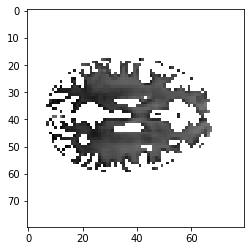

Hurst avg 0.8530676392375364


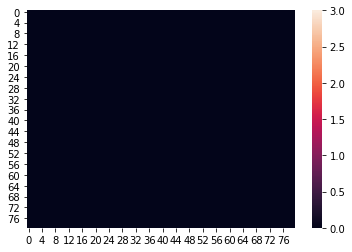

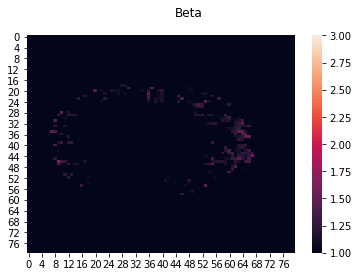

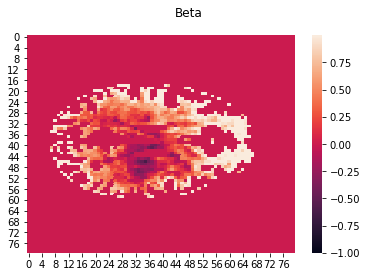

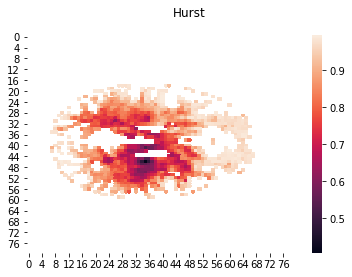

In [20]:
#multiprocessor call to FracTool on long time series 3600 time points
import multiprocessing
from joblib import Parallel, delayed
import os 
import nibabel as nib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from ipynb.fs.defs.Fractool_Current_fGn_Only import FracTool



#load sample slice and convert to np array
example_slice = 'whitematter.nii.gz'
slice_img = nib.load(example_slice, mmap=False)
slice_array = slice_img.get_fdata()
slice_sq = slice_array[:,:,20,:]
print(slice_sq.shape)

#images of slice:
#imgplot = plt.imshow(slice_sq[:,:,1])
imgplot = plt.imshow(slice_sq[:,:,1],cmap='Greys',  interpolation='nearest')
plt.show()

[N1,N2,N3] = slice_sq.shape
row = np.arange(0,N1)
column = np.arange(0,N2)
TR = 2.0 #temporal resolution of signal 

def FracTool_voxel(i, j):
    '''This function returns the Hurst coefficient and class of each voxel in the fMRI slice'''
    global TR
    rawbold = (slice_sq[i,j])
    result = FracTool(rawbold, TR) #run Fractool on each signal in signal array
    H_val = result[1] #result[1] of FracTool is Hurst value
    Class_val = result[0] #result[0] of FracTool is Class
    return result 

#multiprocessing for loop
num_cores = multiprocessing.cpu_count()
output = Parallel(n_jobs=num_cores)(delayed(FracTool_voxel)(i,j) for i in row for j in column)

output = np.array(output)
output = output.astype(np.float64)

Class_matrix = output[:,0]
Hurst_matrix = output[:,1]
Hurst_avg = np.nanmean(Hurst_matrix)
print('Hurst avg', Hurst_avg)
Beta_matrix = output[:,2]



Class_matrix = Class_matrix.reshape(N1,N2)
Class_map = sns.heatmap(Class_matrix, vmin=0, vmax=3)
Class_fig = Class_map.get_figure()
Beta_fig.suptitle('Class')

#Class_fig.savefig('Class_Heatmap.png')
plt.show()

Beta_matrix = Beta_matrix.reshape(N1,N2)
np.savetxt('Beta_matrix.txt',Beta_matrix,fmt='%.2f')
Beta_map = sns.heatmap(Beta_matrix, vmin=1, vmax=3)
Beta_fig = Beta_map.get_figure()
Beta_fig.suptitle('Beta')
Beta_fig.savefig('Beta_Heatmap.png')
plt.show()

Beta_matrix = Beta_matrix.reshape(N1,N2)
np.savetxt('Beta_matrix.txt',Beta_matrix,fmt='%.2f')
Beta_map = sns.heatmap(Beta_matrix, vmin=-1, vmax=0.999)
Beta_fig = Beta_map.get_figure()
Beta_fig.suptitle('Beta')
Beta_fig.savefig('Beta_Heatmap.png')
plt.show()

Hurst_matrix = Hurst_matrix.reshape(N1,N2)
Hurst_map = sns.heatmap(Hurst_matrix)
Hurst_fig = Hurst_map.get_figure()
Hurst_fig.suptitle('Hurst')

#Hurst_fig.savefig('Hurst_Heatmap.png')
plt.show()

(80, 80, 3599)


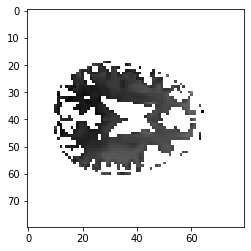

Hurst avg 0.8623306763692672


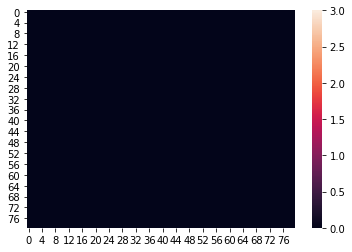

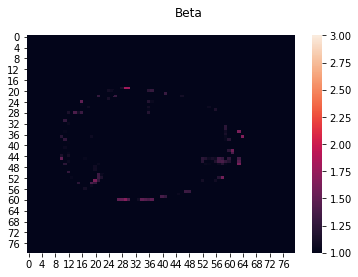

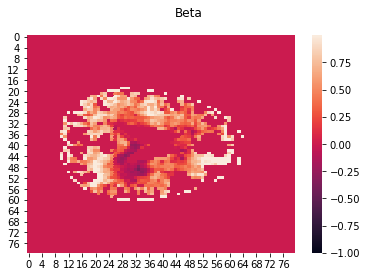

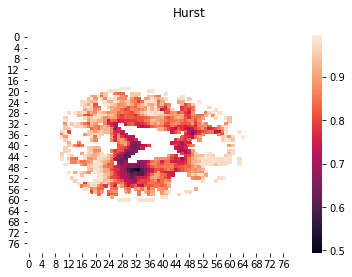

In [9]:
#multiprocessor call to FracTool on long time series 3600 time points
import multiprocessing
from joblib import Parallel, delayed
import os 
import nibabel as nib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from ipynb.fs.defs.Fractool_Current_fGn_Only import FracTool



#load sample slice and convert to np array
example_slice = 'whitematter01.nii.gz'
slice_img = nib.load(example_slice, mmap=False)
slice_array = slice_img.get_fdata()
slice_sq = slice_array[:,:,20,:]
print(slice_sq.shape)

#images of slice:
#imgplot = plt.imshow(slice_sq[:,:,1])
imgplot = plt.imshow(slice_sq[:,:,1],cmap='Greys',  interpolation='nearest')
plt.show()

[N1,N2,N3] = slice_sq.shape
row = np.arange(0,N1)
column = np.arange(0,N2)
TR = 2.0 #temporal resolution of signal 

def FracTool_voxel(i, j):
    '''This function returns the Hurst coefficient and class of each voxel in the fMRI slice'''
    global TR
    rawbold = (slice_sq[i,j])
    result = FracTool(rawbold, TR) #run Fractool on each signal in signal array
    H_val = result[1] #result[1] of FracTool is Hurst value
    Class_val = result[0] #result[0] of FracTool is Class
    return result 

#multiprocessing for loop
num_cores = multiprocessing.cpu_count()
output = Parallel(n_jobs=num_cores)(delayed(FracTool_voxel)(i,j) for i in row for j in column)

output = np.array(output)
output = output.astype(np.float64)

Class_matrix = output[:,0]
Hurst_matrix = output[:,1]
Hurst_avg = np.nanmean(Hurst_matrix)
print('Hurst avg', Hurst_avg)
Beta_matrix = output[:,2]



Class_matrix = Class_matrix.reshape(N1,N2)
Class_map = sns.heatmap(Class_matrix, vmin=0, vmax=3)
Class_fig = Class_map.get_figure()
Beta_fig.suptitle('Class')

#Class_fig.savefig('Class_Heatmap.png')
plt.show()

Beta_matrix = Beta_matrix.reshape(N1,N2)
np.savetxt('Beta_matrix.txt',Beta_matrix,fmt='%.2f')
Beta_map = sns.heatmap(Beta_matrix, vmin=1, vmax=3)
Beta_fig = Beta_map.get_figure()
Beta_fig.suptitle('Beta')
Beta_fig.savefig('Beta_Heatmap.png')
plt.show()

Beta_matrix = Beta_matrix.reshape(N1,N2)
np.savetxt('Beta_matrix.txt',Beta_matrix,fmt='%.2f')
Beta_map = sns.heatmap(Beta_matrix, vmin=-1, vmax=0.999)
Beta_fig = Beta_map.get_figure()
Beta_fig.suptitle('Beta')
Beta_fig.savefig('Beta_Heatmap.png')
plt.show()

Hurst_matrix = Hurst_matrix.reshape(N1,N2)
Hurst_map = sns.heatmap(Hurst_matrix)
Hurst_fig = Hurst_map.get_figure()
Hurst_fig.suptitle('Hurst')

#Hurst_fig.savefig('Hurst_Heatmap.png')
plt.show()

(80, 80, 500)


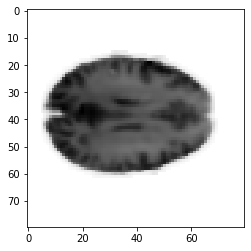

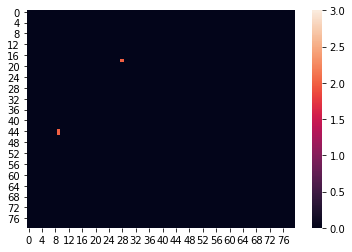

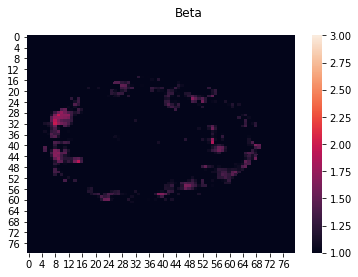

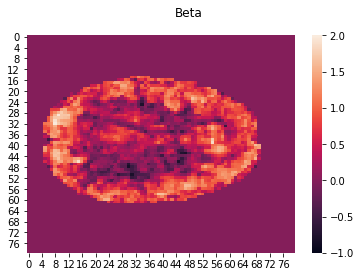

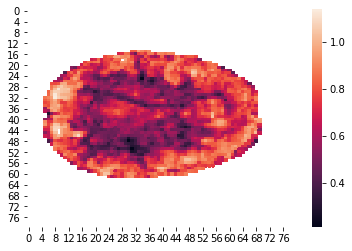

In [4]:
import multiprocessing
from joblib import Parallel, delayed
import os 
import nibabel as nib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from ipynb.fs.defs.Fractool_Current_fGn_Only import FracTool



#load sample slice and convert to np array
example_slice = 'filtered_func_data_clean.nii.gz'
slice_img = nib.load(example_slice, mmap=False)
slice_array = slice_img.get_fdata()
slice_sq = slice_array[:,:,20,0:500]
print(slice_sq.shape)

#images of slice:
#imgplot = plt.imshow(slice_sq[:,:,1])
imgplot = plt.imshow(slice_sq[:,:,1],cmap='Greys',  interpolation='nearest')
plt.show()

[N1,N2,N3] = slice_sq.shape
row = np.arange(0,N1)
column = np.arange(0,N2)
TR = 2.0 #temporal resolution of signal 

def FracTool_voxel(i, j):
    '''This function returns the Hurst coefficient and class of each voxel in the fMRI slice'''
    global TR
    rawbold = (slice_sq[i,j])
    result = FracTool(rawbold, TR) #run Fractool on each signal in signal array
    H_val = result[1] #result[1] of FracTool is Hurst value
    Class_val = result[0] #result[0] of FracTool is Class
    return result 

#multiprocessing for loop
num_cores = multiprocessing.cpu_count()
output = Parallel(n_jobs=num_cores)(delayed(FracTool_voxel)(i,j) for i in row for j in column)

output = np.array(output)
output = output.astype(np.float64)

Class_matrix = output[:,0]
Hurst_matrix = output[:,1]
Beta_matrix = output[:,2]



Class_matrix = Class_matrix.reshape(N1,N2)
Class_map = sns.heatmap(Class_matrix, vmin=0, vmax=3)
Class_fig = Class_map.get_figure()
#Class_fig.savefig('Class_Heatmap.png')
plt.show()

Beta_matrix = Beta_matrix.reshape(N1,N2)
np.savetxt('Beta_matrix.txt',Beta_matrix,fmt='%.2f')
Beta_map = sns.heatmap(Beta_matrix, vmin=1, vmax=3)
Beta_fig = Beta_map.get_figure()
Beta_fig.suptitle('Beta')
Beta_fig.savefig('Beta_Heatmap.png')
plt.show()

Beta_matrix = Beta_matrix.reshape(N1,N2)
np.savetxt('Beta_matrix.txt',Beta_matrix,fmt='%.2f')
Beta_map = sns.heatmap(Beta_matrix, vmin=-1, vmax=2)
Beta_fig = Beta_map.get_figure()
Beta_fig.suptitle('Beta')
Beta_fig.savefig('Beta_Heatmap.png')
plt.show()

Hurst_matrix = Hurst_matrix.reshape(N1,N2)
Hurst_map = sns.heatmap(Hurst_matrix)
Hurst_fig = Hurst_map.get_figure()
#Hurst_fig.savefig('Hurst_Heatmap.png')
plt.show()

(80, 80, 3599)


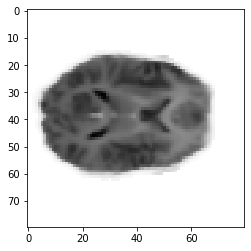

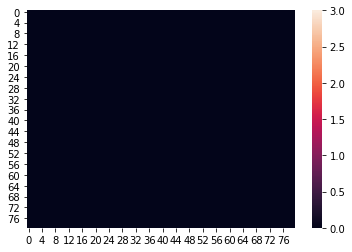

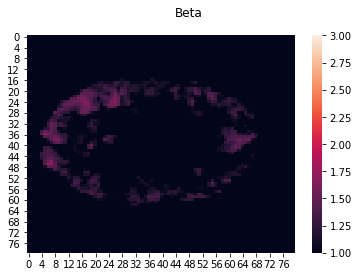

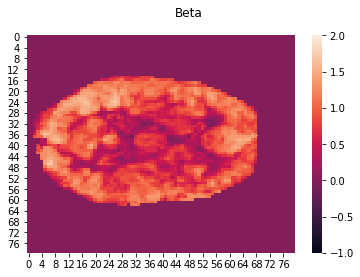

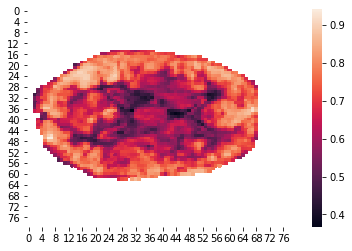

In [6]:
import multiprocessing
from joblib import Parallel, delayed
import os 
import nibabel as nib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from ipynb.fs.defs.Fractool_Current_fGn_Only import FracTool



#load sample slice and convert to np array
example_slice = 'filtered_func_data_clean.nii.gz'
slice_img = nib.load(example_slice, mmap=False)
slice_array = slice_img.get_fdata()
slice_sq = slice_array[:,:,15,:]
print(slice_sq.shape)

#images of slice:
#imgplot = plt.imshow(slice_sq[:,:,1])
imgplot = plt.imshow(slice_sq[:,:,1],cmap='Greys',  interpolation='nearest')
plt.show()

[N1,N2,N3] = slice_sq.shape
row = np.arange(0,N1)
column = np.arange(0,N2)
TR = 2.0 #temporal resolution of signal 

def FracTool_voxel(i, j):
    '''This function returns the Hurst coefficient and class of each voxel in the fMRI slice'''
    global TR
    rawbold = (slice_sq[i,j])
    result = FracTool(rawbold, TR) #run Fractool on each signal in signal array
    H_val = result[1] #result[1] of FracTool is Hurst value
    Class_val = result[0] #result[0] of FracTool is Class
    return result 

#multiprocessing for loop
num_cores = multiprocessing.cpu_count()
output = Parallel(n_jobs=num_cores)(delayed(FracTool_voxel)(i,j) for i in row for j in column)

output = np.array(output)
output = output.astype(np.float64)

Class_matrix = output[:,0]
Hurst_matrix = output[:,1]
Beta_matrix = output[:,2]



Class_matrix = Class_matrix.reshape(N1,N2)
Class_map = sns.heatmap(Class_matrix, vmin=0, vmax=3)
Class_fig = Class_map.get_figure()
#Class_fig.savefig('Class_Heatmap.png')
plt.show()

Beta_matrix = Beta_matrix.reshape(N1,N2)
np.savetxt('Beta_matrix.txt',Beta_matrix,fmt='%.2f')
Beta_map = sns.heatmap(Beta_matrix, vmin=1, vmax=3)
Beta_fig = Beta_map.get_figure()
Beta_fig.suptitle('Beta')
Beta_fig.savefig('Beta_Heatmap.png')
plt.show()

Beta_matrix = Beta_matrix.reshape(N1,N2)
np.savetxt('Beta_matrix.txt',Beta_matrix,fmt='%.2f')
Beta_map = sns.heatmap(Beta_matrix, vmin=-1, vmax=2)
Beta_fig = Beta_map.get_figure()
Beta_fig.suptitle('Beta')
Beta_fig.savefig('Beta_Heatmap.png')
plt.show()

Hurst_matrix = Hurst_matrix.reshape(N1,N2)
Hurst_map = sns.heatmap(Hurst_matrix)
Hurst_fig = Hurst_map.get_figure()
#Hurst_fig.savefig('Hurst_Heatmap.png')
plt.show()

(80, 80, 3599)


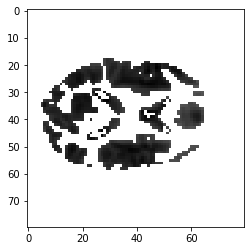

Hurst avg 0.702228913527711


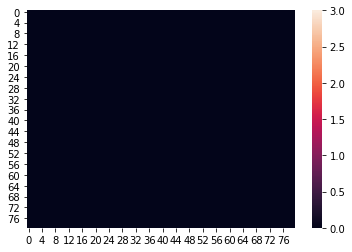

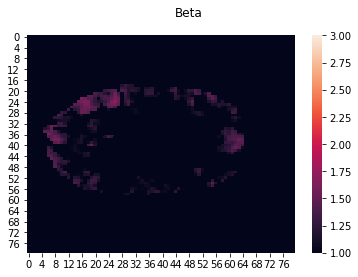

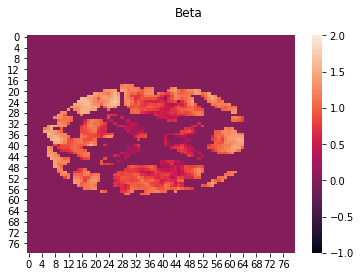

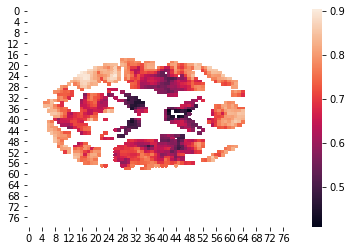

In [7]:
import multiprocessing
from joblib import Parallel, delayed
import os 
import nibabel as nib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from ipynb.fs.defs.Fractool_Current_fGn_Only import FracTool



#load sample slice and convert to np array
example_slice = 'greymatter06_clean.nii.gz'
slice_img = nib.load(example_slice, mmap=False)
slice_array = slice_img.get_fdata()
slice_sq = slice_array[:,:,15,:]
print(slice_sq.shape)

#images of slice:
#imgplot = plt.imshow(slice_sq[:,:,1])
imgplot = plt.imshow(slice_sq[:,:,1],cmap='Greys',  interpolation='nearest')
plt.show()

[N1,N2,N3] = slice_sq.shape
row = np.arange(0,N1)
column = np.arange(0,N2)
TR = 2.0 #temporal resolution of signal 

def FracTool_voxel(i, j):
    '''This function returns the Hurst coefficient and class of each voxel in the fMRI slice'''
    global TR
    rawbold = (slice_sq[i,j])
    result = FracTool(rawbold, TR) #run Fractool on each signal in signal array
    H_val = result[1] #result[1] of FracTool is Hurst value
    Class_val = result[0] #result[0] of FracTool is Class
    return result 

#multiprocessing for loop
num_cores = multiprocessing.cpu_count()
output = Parallel(n_jobs=num_cores)(delayed(FracTool_voxel)(i,j) for i in row for j in column)

output = np.array(output)
output = output.astype(np.float64)

Class_matrix = output[:,0]
Hurst_matrix = output[:,1]
Hurst_avg = np.nanmean(Hurst_matrix)
print('Hurst avg', Hurst_avg)
Beta_matrix = output[:,2]



Class_matrix = Class_matrix.reshape(N1,N2)
Class_map = sns.heatmap(Class_matrix, vmin=0, vmax=3)
Class_fig = Class_map.get_figure()
#Class_fig.savefig('Class_Heatmap.png')
plt.show()

Beta_matrix = Beta_matrix.reshape(N1,N2)
np.savetxt('Beta_matrix.txt',Beta_matrix,fmt='%.2f')
Beta_map = sns.heatmap(Beta_matrix, vmin=1, vmax=3)
Beta_fig = Beta_map.get_figure()
Beta_fig.suptitle('Beta')
Beta_fig.savefig('Beta_Heatmap.png')
plt.show()

Beta_matrix = Beta_matrix.reshape(N1,N2)
np.savetxt('Beta_matrix.txt',Beta_matrix,fmt='%.2f')
Beta_map = sns.heatmap(Beta_matrix, vmin=-1, vmax=2)
Beta_fig = Beta_map.get_figure()
Beta_fig.suptitle('Beta')
Beta_fig.savefig('Beta_Heatmap.png')
plt.show()

Hurst_matrix = Hurst_matrix.reshape(N1,N2)
Hurst_map = sns.heatmap(Hurst_matrix)
Hurst_fig = Hurst_map.get_figure()
Hurst_fig.savefig('Hurst_Heatmap.png')
plt.show()

(80, 80, 3599)


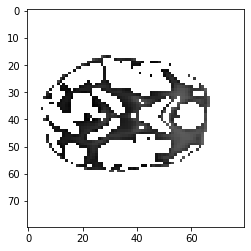

Hurst avg 0.6282045206539435


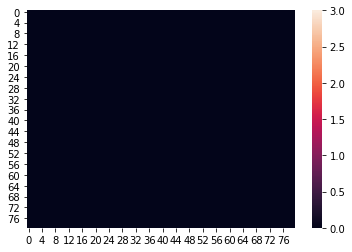

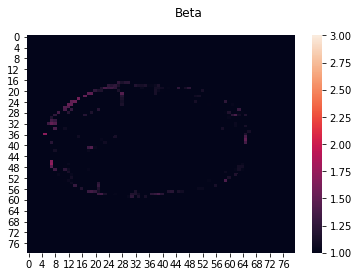

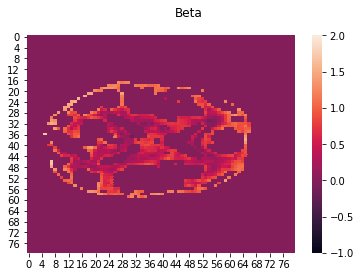

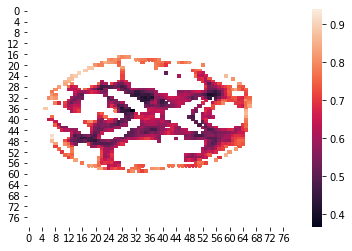

In [8]:
import multiprocessing
from joblib import Parallel, delayed
import os 
import nibabel as nib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from ipynb.fs.defs.Fractool_Current_fGn_Only import FracTool



#load sample slice and convert to np array
example_slice = 'whitematter06_clean.nii.gz'
slice_img = nib.load(example_slice, mmap=False)
slice_array = slice_img.get_fdata()
slice_sq = slice_array[:,:,15,:]
print(slice_sq.shape)

#images of slice:
#imgplot = plt.imshow(slice_sq[:,:,1])
imgplot = plt.imshow(slice_sq[:,:,1],cmap='Greys',  interpolation='nearest')
plt.show()

[N1,N2,N3] = slice_sq.shape
row = np.arange(0,N1)
column = np.arange(0,N2)
TR = 2.0 #temporal resolution of signal 

def FracTool_voxel(i, j):
    '''This function returns the Hurst coefficient and class of each voxel in the fMRI slice'''
    global TR
    rawbold = (slice_sq[i,j])
    result = FracTool(rawbold, TR) #run Fractool on each signal in signal array
    H_val = result[1] #result[1] of FracTool is Hurst value
    Class_val = result[0] #result[0] of FracTool is Class
    return result 

#multiprocessing for loop
num_cores = multiprocessing.cpu_count()
output = Parallel(n_jobs=num_cores)(delayed(FracTool_voxel)(i,j) for i in row for j in column)

output = np.array(output)
output = output.astype(np.float64)

Class_matrix = output[:,0]
Hurst_matrix = output[:,1]
Hurst_avg = np.nanmean(Hurst_matrix)
print('Hurst avg', Hurst_avg)
Beta_matrix = output[:,2]



Class_matrix = Class_matrix.reshape(N1,N2)
Class_map = sns.heatmap(Class_matrix, vmin=0, vmax=3)
Class_fig = Class_map.get_figure()
#Class_fig.savefig('Class_Heatmap.png')
plt.show()

Beta_matrix = Beta_matrix.reshape(N1,N2)
np.savetxt('Beta_matrix.txt',Beta_matrix,fmt='%.2f')
Beta_map = sns.heatmap(Beta_matrix, vmin=1, vmax=3)
Beta_fig = Beta_map.get_figure()
Beta_fig.suptitle('Beta')
Beta_fig.savefig('Beta_Heatmap.png')
plt.show()

Beta_matrix = Beta_matrix.reshape(N1,N2)
np.savetxt('Beta_matrix.txt',Beta_matrix,fmt='%.2f')
Beta_map = sns.heatmap(Beta_matrix, vmin=-1, vmax=2)
Beta_fig = Beta_map.get_figure()
Beta_fig.suptitle('Beta')
Beta_fig.savefig('Beta_Heatmap.png')
plt.show()

Hurst_matrix = Hurst_matrix.reshape(N1,N2)
Hurst_map = sns.heatmap(Hurst_matrix)
Hurst_fig = Hurst_map.get_figure()
#Hurst_fig.savefig('Hurst_Heatmap.png')
plt.show()

(80, 80, 500)


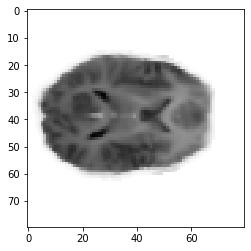

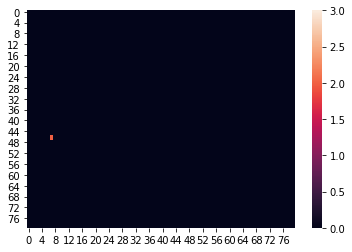

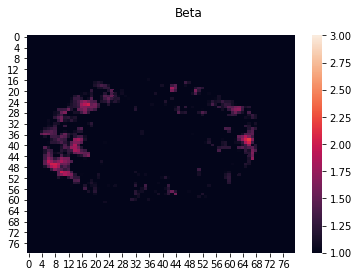

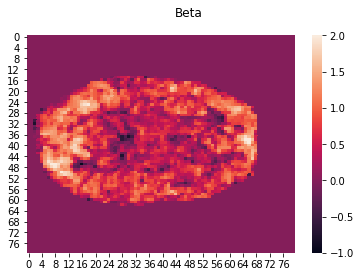

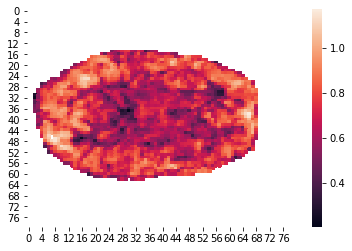

In [1]:
import multiprocessing
from joblib import Parallel, delayed
import os 
import nibabel as nib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from ipynb.fs.defs.Fractool_Current_fGn_Only import FracTool



#load sample slice and convert to np array
example_slice = 'sub-06_500tp_filtered_func_data_clean.nii.gz'
slice_img = nib.load(example_slice, mmap=False)
slice_array = slice_img.get_fdata()
slice_sq = slice_array[:,:,15,:]
print(slice_sq.shape)

#images of slice:
#imgplot = plt.imshow(slice_sq[:,:,1])
imgplot = plt.imshow(slice_sq[:,:,1],cmap='Greys',  interpolation='nearest')
plt.show()

[N1,N2,N3] = slice_sq.shape
row = np.arange(0,N1)
column = np.arange(0,N2)
TR = 2.0 #temporal resolution of signal 

def FracTool_voxel(i, j):
    '''This function returns the Hurst coefficient and class of each voxel in the fMRI slice'''
    global TR
    rawbold = (slice_sq[i,j])
    result = FracTool(rawbold, TR) #run Fractool on each signal in signal array
    H_val = result[1] #result[1] of FracTool is Hurst value
    Class_val = result[0] #result[0] of FracTool is Class
    return result 

#multiprocessing for loop
num_cores = multiprocessing.cpu_count()
output = Parallel(n_jobs=num_cores)(delayed(FracTool_voxel)(i,j) for i in row for j in column)

output = np.array(output)
output = output.astype(np.float64)

Class_matrix = output[:,0]
Hurst_matrix = output[:,1]
Beta_matrix = output[:,2]



Class_matrix = Class_matrix.reshape(N1,N2)
Class_map = sns.heatmap(Class_matrix, vmin=0, vmax=3)
Class_fig = Class_map.get_figure()
#Class_fig.savefig('Class_Heatmap.png')
plt.show()

Beta_matrix = Beta_matrix.reshape(N1,N2)
np.savetxt('Beta_matrix.txt',Beta_matrix,fmt='%.2f')
Beta_map = sns.heatmap(Beta_matrix, vmin=1, vmax=3)
Beta_fig = Beta_map.get_figure()
Beta_fig.suptitle('Beta')
Beta_fig.savefig('Beta_Heatmap.png')
plt.show()

Beta_matrix = Beta_matrix.reshape(N1,N2)
np.savetxt('Beta_matrix.txt',Beta_matrix,fmt='%.2f')
Beta_map = sns.heatmap(Beta_matrix, vmin=-1, vmax=2)
Beta_fig = Beta_map.get_figure()
Beta_fig.suptitle('Beta')
Beta_fig.savefig('Beta_Heatmap.png')
plt.show()

Hurst_matrix = Hurst_matrix.reshape(N1,N2)
Hurst_map = sns.heatmap(Hurst_matrix)
Hurst_fig = Hurst_map.get_figure()
#Hurst_fig.savefig('Hurst_Heatmap.png')
plt.show()